In [1]:
# Imports:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Data

In [2]:
# a.  Load patient_priority.csv into a pandas DataFrame. Drop the 'triage' column and print the header. 
#     Use pandas.DataFrame.describe to summarize the data. 

data = pd.read_csv("C:/Users/miche/Downloads/patient_priority.csv")
data = data.drop(columns=["triage"])

display(data.head())
display(data.describe())
display(data.shape)

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6962.000000,6962.000000,6961.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000,6962.000000
mean,2011.954180,57.450014,0.531964,0.529015,109.629991,184.711290,163.502442,0.061764,98.394283,56.813416,111.091640,27.190908,0.467386,0.071531,0.039500
std,1560.966466,11.904948,0.499013,1.253791,21.534852,32.010359,15.458693,0.240743,28.598084,22.889316,17.470033,7.362886,0.102663,0.257729,0.194796
min,0.000000,28.000000,0.000000,0.000000,60.000000,150.000000,138.000000,0.000000,55.120000,21.000000,81.000000,10.300000,0.078000,0.000000,0.000000
25%,604.000000,48.000000,0.000000,0.000000,92.000000,164.000000,150.000000,0.000000,78.707500,36.000000,97.000000,21.800000,0.467386,0.000000,0.000000
50%,1628.500000,56.000000,1.000000,0.000000,111.000000,179.000000,163.000000,0.000000,93.000000,55.000000,111.000000,26.200000,0.467386,0.000000,0.000000
75%,3368.750000,66.000000,1.000000,0.000000,127.000000,192.000000,177.000000,0.000000,111.632500,77.000000,125.000000,31.000000,0.467386,0.000000,0.000000
max,5109.000000,82.000000,1.000000,4.000000,165.000000,294.000000,202.000000,1.000000,199.000000,99.000000,171.000000,66.800000,2.420000,1.000000,1.000000


(6962, 17)

In [3]:
# In a Markdown cell, explain the meaning of each column, make observations based on the summary statistics, 
# and discuss whether they provide useful insights.

**Explanation:**

The dataset contains 6962 patient records with 17 features describing health status and demographics. Most variables are numerical, with a few categorical ones like Residence_type and smoking_status.

The age distribution ranges from 28 to 82, with a mean of 57, suggesting a middle-aged to elderly population. Features like blood pressure, cholesterol, and bmi show wide variability, which may be useful for identifying risk factors.

In [4]:
# b.  Use pandas.DataFrame.info to check if the entries are the correct data types and if there are any missing values. 
#     Use pandas.DataFrame.duplicates to check for duplicate entries. 
#     Clean the dataset so there are no missing values, duplicate rows, or incorrect data types. 

display(data.info())
print("Duplicates: \n", data.duplicated().sum())
print("Nulls or Missing: \n", data.isna().sum())

# Clean-up one missing sample/value in gender column and check whether action occurred
data = data.dropna()
print("\n\n Gender Column: \n", data["gender"].isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 17 columns):
Unnamed: 0           6962 non-null int64
age                  6962 non-null float64
gender               6961 non-null float64
chest pain type      6962 non-null float64
blood pressure       6962 non-null float64
cholesterol          6962 non-null float64
max heart rate       6962 non-null float64
exercise angina      6962 non-null float64
plasma glucose       6962 non-null float64
skin_thickness       6962 non-null float64
insulin              6962 non-null float64
bmi                  6962 non-null float64
diabetes_pedigree    6962 non-null float64
hypertension         6962 non-null float64
heart_disease        6962 non-null float64
Residence_type       6962 non-null object
smoking_status       6962 non-null object
dtypes: float64(14), int64(1), object(2)
memory usage: 924.7+ KB


None

Duplicates: 
 0
Nulls or Missing: 
 Unnamed: 0           0
age                  0
gender               1
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
dtype: int64


 Gender Column: 
 0


In [5]:
# Document the changes and cleaning process in Markdown.

**Explanation:**

After checking the dataset for missing values, duplicates, and incorrect data types, I found that there was 1 missing value in the gender column. Since there are 6962 rows, I decided that it wouldn't affect the dataset by removing the sample/row with the missing value. After doing this, I confirmed that changes had been implemented, and found that this action went through. No duplicate rows were found, and all data types were appropriate for analysis.

In [6]:
# c.  Use pandas.get_dummies to one-hot-encode any categorical (string) columns.

# # Obtain categorical columns, and encode them - make sure actions were recorded
# categorical = data[["Residence_type", "smoking_status"]]
# display(categorical.head())

encoded_data = pd.get_dummies(data)
display(encoded_data.head())

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,...,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,...,19.0,0.467386,0.0,0.0,0,1,0,0,1,0
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,...,18.0,0.467386,0.0,0.0,0,1,0,0,1,0
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,...,23.0,0.467386,0.0,0.0,0,1,0,0,1,0
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,...,18.0,0.467386,0.0,0.0,0,1,0,0,1,0
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,...,21.0,0.467386,0.0,0.0,0,1,0,0,1,0


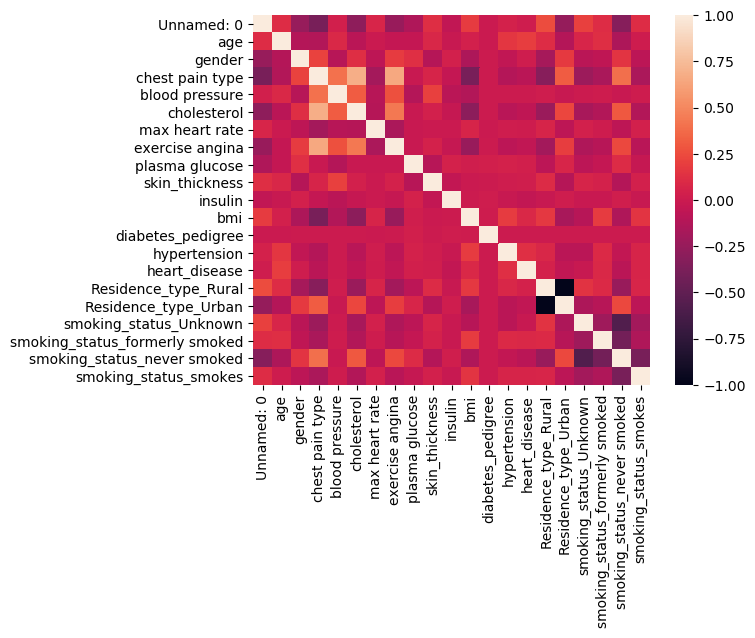

In [7]:
# d.  Use seaborn.heatmap to display the correlation matrix of the features. 
#     Use seaborn.pairplot to generate scatter plots and histograms. 

sns.heatmap(data=encoded_data.corr())
#sns.pairplot(data=encoded_data)

In [8]:
# Record your observations and discuss the insights gained in Markdown. 

**Explanation:**

The heatmap shows the correlation between numerical features in the dataset after encoding. Most features generally have moderate to high correlation with one another, with little low correlation indicated. For example, there is a high positive correlation between these columns:

1. cholesterol and chest pain type, and
2. exercise angina and chest pain type.

The pairplot, however, appears cluttered and difficult to interpret. This is likely because the dataset includes many features and one-hot encoded columns, which leads to a large number of subplots. Additionally, since many features are binary or categorical, the scatterplots don't show smooth distributions, making it harder to visually detect patterns or clusters.

# 2. Modeling

In [9]:
# a.  Use sklearn.preprocessing.MinMaxScaler to scale the data and print the transformed header.

scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(encoded_data), columns=encoded_data.columns)
scaled.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,...,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.000000,0.222222,1.0,0.50,0.761905,1.000000,0.53125,0.0,0.367528,0.282051,...,0.153982,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000196,0.388889,0.0,0.75,0.952381,0.208333,0.28125,0.0,0.138171,0.333333,...,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000391,0.166667,1.0,0.50,0.666667,1.000000,0.28125,0.0,0.298026,0.410256,...,0.224779,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.000587,0.370370,0.0,1.00,0.742857,0.444444,0.28125,1.0,0.117320,0.384615,...,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000783,0.481481,1.0,0.75,0.857143,0.312500,0.28125,0.0,0.367528,0.884615,...,0.189381,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
# b.  Use sklearn.cluster.DBSCAN to cluster the data. 
#     Create at least 10 different models using various hyperparameter combinations (eps, min_samples, metric, p). 
#     Calculate the silhouette score for each model and tabulate the results. 

epsilon = [0.18, 0.25, 0.3, 0.25, 0.35, 0.4, 0.25, 0.23, 0.27, 0.19, 
           0.25, 0.23, 0.24, 0.2, 0.23, 0.26, 0.19, 0.18, 0.29, 0.21, 
           0.22, 0.28, 0.29, 0.31, 0.23, 0.28, 0.31, 0.33, 0.29, 0.28, 
           0.29, 0.31, 0.28, 0.31, 0.33, 0.29, 0.28, 0.31, 0.28, 0.31]
min_points = [5, 5, 8, 4, 7, 9, 5, 6, 7, 8, 
              7, 9, 9, 8, 7, 9, 3, 4, 6, 7, 
              10, 11, 12, 13, 14, 15, 16, 12, 13, 13, 
              14, 15, 14, 10, 13, 14, 15, 10, 11, 15]

model_count = 0
clusters = []
scores = []
for eps,min_point in zip(epsilon, min_points):
    print("Model: ", model_count)
    model_count += 1
    db = DBSCAN(eps=eps, min_samples = min_point)
    db_clusters = db.fit_predict(scaled)
    clusters.append(db_clusters)
    score = silhouette_score(scaled, db_clusters)
    scores.append(score)
    print(f"Eps:{eps} Min Points: {min_point} Clusters: {len(set(db_clusters))} Score: {score} \n")

Model:  0
Eps:0.18 Min Points: 5 Clusters: 6 Score: -0.16940399810946521 

Model:  1
Eps:0.25 Min Points: 5 Clusters: 14 Score: -0.14230419808718936 

Model:  2
Eps:0.3 Min Points: 8 Clusters: 8 Score: -0.059841016829333245 

Model:  3
Eps:0.25 Min Points: 4 Clusters: 24 Score: -0.1524790014439059 

Model:  4
Eps:0.35 Min Points: 7 Clusters: 42 Score: -0.3327208957959599 

Model:  5
Eps:0.4 Min Points: 9 Clusters: 35 Score: -0.22350657961233458 

Model:  6
Eps:0.25 Min Points: 5 Clusters: 14 Score: -0.14230419808718936 

Model:  7
Eps:0.23 Min Points: 6 Clusters: 5 Score: -0.13445361088185936 

Model:  8
Eps:0.27 Min Points: 7 Clusters: 10 Score: -0.13532549132619212 

Model:  9
Eps:0.19 Min Points: 8 Clusters: 3 Score: -0.14985933841073273 

Model:  10
Eps:0.25 Min Points: 7 Clusters: 4 Score: -0.1032792360010671 

Model:  11
Eps:0.23 Min Points: 9 Clusters: 2 Score: -0.09477395707231268 

Model:  12
Eps:0.24 Min Points: 9 Clusters: 2 Score: -0.08605066868907917 

Model:  13
Eps:0.2 M

In [11]:
# c.  Select the best model for this use case and justify your choice in Markdown. 
#     If initial models do not produce meaningful clusters, 
#     try additional hyperparameter settings and document any iterations and observations. 

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

model_configs = [(3, 'average'),(4, 'complete'),(5, 'ward'),(6, 'single'),(7, 'average'),
                 (3, 'ward'),(4, 'average'),(5, 'average'),(6, 'ward'),(7, 'complete')]

for i, (n_clusters, linkage_method) in enumerate(model_configs):
    print(f"Model {i} — {n_clusters} Clusters\n")

    # K-Means
    km = KMeans(n_clusters=n_clusters, random_state=42)
    km_labels = km.fit_predict(scaled)
    km_score = silhouette_score(scaled, km_labels)
    print("K-Means:")
    print(f"Score: {km_score:.4f}")
    print("Cluster counts:", pd.Series(km_labels).value_counts().to_dict())
    print()

    # Agglomerative - Sklearn Hierarchical
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    ac_labels = ac.fit_predict(scaled)
    ac_score = silhouette_score(scaled, ac_labels)
    print(f"Agglomerative ({linkage_method}):")
    print(f"Score: {ac_score:.4f}")
    print("Cluster counts:", pd.Series(ac_labels).value_counts().to_dict())
    print()

    # SciPy Hierarchical
    scipy_distances = linkage(scaled, method=linkage_method, metric="euclidean")
    scipy_labels = fcluster(scipy_distances, n_clusters, criterion="maxclust")
    scipy_score = silhouette_score(scaled, scipy_labels)
    print(f"SciPy ({linkage_method}):")
    print(f"Score: {scipy_score:.4f}")
    print("Cluster counts:", pd.Series(scipy_labels).value_counts().to_dict())
    print("-" * 50 + "\n")

Model 0 — 3 Clusters

K-Means:
Score: 0.2439
Cluster counts: {1: 2785, 0: 2512, 2: 1664}

Agglomerative (average):
Score: 0.2380
Cluster counts: {0: 3667, 1: 1750, 2: 1544}

SciPy (average):
Score: 0.2380
Cluster counts: {1: 3667, 3: 1750, 2: 1544}
--------------------------------------------------

Model 1 — 4 Clusters

K-Means:
Score: 0.2126
Cluster counts: {0: 2512, 1: 1709, 2: 1664, 3: 1076}

Agglomerative (complete):
Score: 0.2041
Cluster counts: {0: 2535, 1: 1750, 3: 1544, 2: 1132}

SciPy (complete):
Score: 0.2041
Cluster counts: {4: 2535, 2: 1750, 1: 1544, 3: 1132}
--------------------------------------------------

Model 2 — 5 Clusters

K-Means:
Score: 0.2242
Cluster counts: {4: 1713, 0: 1664, 1: 1552, 2: 1072, 3: 960}

Agglomerative (ward):
Score: 0.2759
Cluster counts: {0: 2739, 1: 1544, 2: 1006, 3: 883, 4: 789}

SciPy (ward):
Score: 0.2759
Cluster counts: {1: 2739, 3: 1544, 2: 1006, 5: 883, 4: 789}
--------------------------------------------------

Model 3 — 6 Clusters

K-M

In [13]:
for i in range(0, 39):
    cluster_labels = clusters[i]
    unique_labels = np.unique(cluster_labels)
    
    if 2 < len(unique_labels) <= 10:
        print("Model: ", i)
        print("Score: ", scores[i])
        print("Number of Clusters:", len(unique_labels))
        print(pd.Series(cluster_labels).value_counts())
        print()
    else:
        continue

Model:  0
Score:  -0.16940399810946521
Number of Clusters: 6
-1    6921
 0      11
 1      10
 3       8
 2       6
 4       5
dtype: int64

Model:  2
Score:  -0.059841016829333245
Number of Clusters: 8
-1    6228
 6     627
 1      28
 0      24
 2      22
 4      14
 3       9
 5       9
dtype: int64

Model:  7
Score:  -0.13445361088185936
Number of Clusters: 5
-1    6678
 0     260
 1      12
 3       6
 2       5
dtype: int64

Model:  8
Score:  -0.13532549132619212
Number of Clusters: 10
-1    6398
 4     486
 5      17
 0      16
 2      10
 3       7
 6       7
 1       7
 8       7
 7       6
dtype: int64

Model:  9
Score:  -0.14985933841073273
Number of Clusters: 3
-1    6944
 0       9
 1       8
dtype: int64

Model:  10
Score:  -0.1032792360010671
Number of Clusters: 4
-1    6582
 0     360
 2      11
 1       8
dtype: int64

Model:  13
Score:  -0.15570210209124904
Number of Clusters: 6
-1    6919
 2       9
 4       9
 3       8
 1       8
 0       8
dtype: int64

Model:  14

**Explanation:**

- Select the best model for this use case and justify your choice in Markdown.
- If initial models do not produce meaningful clusters, try additional hyperparameter settings and document any iterations and observations. 

After testing over 40 DBSCAN models with various combinations of eps and min_samples, I found that none produced a positive silhouette score. As a result, I explored alternative clustering methods — including K-Means and Agglomerative Clustering (via both Scikit-learn and SciPy) — which consistently yielded positive silhouette scores. This led me to conclude that DBSCAN is not well-suited for this dataset, likely due to varying cluster densities and the presence of many binary features.

Out of curiosity and thoroughness, I continued refining DBSCAN parameters and identified the top-performing models below:

| Model | Score     | # Clusters | Cluster -1 | Cluster 0 | Cluster 1 |
|-------|-----------|------------|------------|-----------|-----------|
| 15    | -0.0837   | 3          | 6557       | 391       | 13        |
| 21    | -0.0745   | 3          | 6477       | 471       | 13        |
| 23    |**-0.0591**| 3          | 6334       | 14        | 613       |
| 26    | -0.0628   | 3          | 6386       | 556       | 19        |
| 28    | -0.0711   | 3          | 6453       | 492       | 16        |
| 29    | -0.0772   | 3          | 6497       | 451       | 13        |
| 30    | -0.0722   | 3          | 6461       | 484       | 16        |
| 31    | -0.0603   | 3          | 6369       | 574       | 18        |
| 35    | -0.0722   | 3          | 6461       | 484       | 16        |
| 38    | -0.0745   | 3          | 6477       | 471       | 13        |

I selected **Model 23** as the best DBSCAN model for the following reasons:
- It produced the **highest silhouette score** among all DBSCAN models.
- It had the **lowest number of points classified as noise**, meaning more data was successfully grouped.
- Cluster 1 contained a meaningful number of points (613), unlike other models where clusters had fewer than 20 points.
- It generalized the data better than models that fragmented the dataset into many tiny clusters.

Additionally, I observed that:
- eps values above 0.4 or below 0.18 caused the model to collapse into a single cluster.
- min_samples values below 3 or above 15 led to similar issues.
These constraints limited the viable parameter space, reinforcing the challenge of applying DBSCAN to this dataset.

In conclusion, while DBSCAN did not yield strong clustering performance, Model 23 was the most stable and interpretable among the tested configurations.

# 3. Conclusion

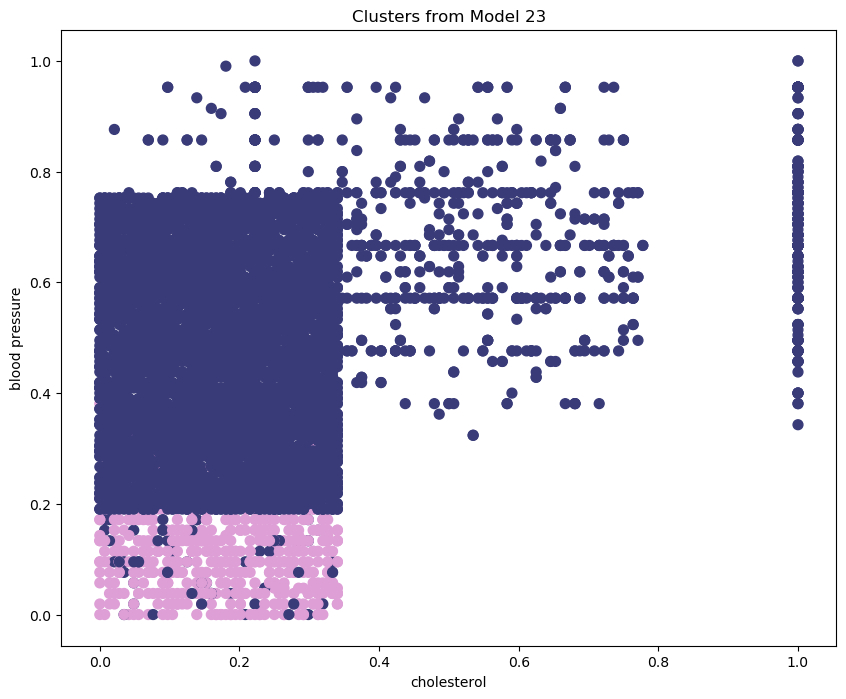

In [14]:
# a.  Choose a pair of features and generate a scatter plot of the data, 
#     coloring points according to the clusters assigned by your best model. 

best_index = 23
cluster_labels = clusters[best_index]

plt.figure(figsize=(10, 8))
#plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.scatter(x=scaled["cholesterol"], y=scaled["blood pressure"], c=cluster_labels, s=50, cmap='tab20b')
plt.title("Clusters from Model 23")
plt.xlabel("cholesterol")
plt.ylabel("blood pressure")
plt.show()

In [15]:
# Comment on the plot in Markdown.

**Explanation:**

The scatter plot shows patient clusters based on cholesterol and blood pressure. Cluster -1 (or noise) spans a wide range of blood pressure values and includes patients with elevated cholesterol, suggesting higher severity. Cluster 1 (pink) is concentrated in the low blood pressure range, which may indicate a more stable or less critical group. Since only 0.2% of data points are classified into cluster 0, they are very hard to visualize in this vast dataset. This reinforces the need to consider alternative clustering methods, such as hierarchical clustering or K-Means, which may better handle the structure of this dataset.

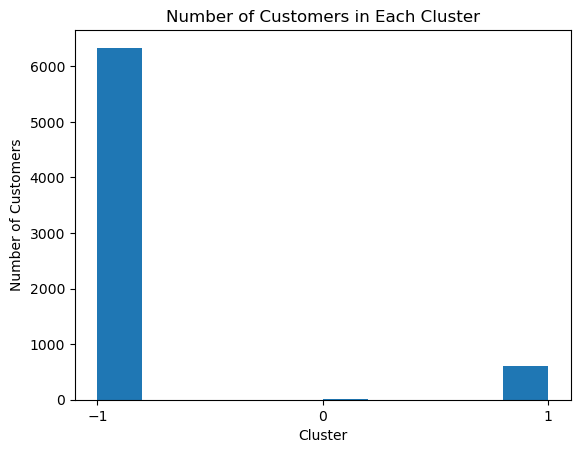

In [16]:
# b.  Generate a histogram showing the number of customers in each cluster 

plt.hist(x=cluster_labels)
plt.xticks([-1,0,1])
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Cluster')
plt.show()

In [17]:
# Provide observations in Markdown, noting whether cluster sizes make sense.

**Explanation:**

Based on the .value_counts() method I observed earlier, these sizes make sense. There were 6334 points classified as noise, and, 613 and 14 points classified into clusters. On the plot, I can see that these points were correctly described.

In [18]:
# c.  Create a separate DataFrame for each cluster and use pandas.DataFrame.describe to describe each group.

cluster_1 = scaled[cluster_labels == 0]
cluster_2 = scaled[cluster_labels == 1]

display(cluster_1.describe())
display(cluster_2.describe())

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,...,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,14.000000,14.000000,14.0,14.0,14.000000,14.000000,14.000000,14.0,14.000000,14.000000,...,14.000000,14.000000,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
mean,0.068590,0.465608,1.0,1.0,0.541497,0.231647,0.122768,0.0,0.256325,0.384615,...,0.175474,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
std,0.021244,0.082772,0.0,0.0,0.071256,0.028255,0.061243,0.0,0.115530,0.157581,...,0.028773,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.014093,0.277778,1.0,1.0,0.380952,0.222222,0.031250,0.0,0.110370,0.153846,...,0.136283,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,0.066843,0.430556,1.0,1.0,0.488095,0.222222,0.109375,0.0,0.167709,0.233974,...,0.153982,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50%,0.067724,0.462963,1.0,1.0,0.571429,0.222222,0.109375,0.0,0.228524,0.410256,...,0.180531,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75%,0.069289,0.500000,1.0,1.0,0.571429,0.222222,0.144531,0.0,0.364053,0.522436,...,0.189381,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
max,0.105696,0.611111,1.0,1.0,0.666667,0.326389,0.265625,0.0,0.450931,0.589744,...,0.224779,0.166262,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,...,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,613.000000,613.000000,613.0,613.0,613.000000,613.000000,613.000000,613.0,613.000000,613.000000,...,613.000000,613.000000,613.0,613.0,613.0,613.0,613.0,613.0,613.0,613.0
mean,0.076396,0.409734,1.0,0.0,0.134343,0.171946,0.428757,0.0,0.433093,0.154996,...,0.276378,0.151965,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
std,0.043563,0.147772,0.0,0.0,0.089119,0.100997,0.235410,0.0,0.186459,0.096751,...,0.049981,0.110390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000587,0.240741,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.047818,0.000000,...,0.148673,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25%,0.038559,0.277778,1.0,0.0,0.057143,0.083333,0.234375,0.0,0.304976,0.076923,...,0.242478,0.068318,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
50%,0.077510,0.351852,1.0,0.0,0.133333,0.166667,0.437500,0.0,0.402280,0.141026,...,0.277876,0.122118,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
75%,0.112742,0.518519,1.0,0.0,0.190476,0.263889,0.625000,0.0,0.548235,0.230769,...,0.320354,0.216909,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
max,0.171854,0.833333,1.0,0.0,0.457143,0.340278,0.828125,0.0,0.993050,0.538462,...,0.373451,0.564475,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
# d.  Provide a written conclusion summarizing the characteristics of each patient group
#     and rank the urgency level for each cluster. 
#     Include actionable recommendations for how the clusters could be used in a triage system.

**Explanation:**

Cluster Interpretation:

Cluster one appears to contain critical patients, as seen by the mean values in each column. Most features have mean values close to their maximums, suggesting that patients in this group exhibit more severe symptoms.

Cluster two appears to contain moderately critical patients. The average values are somewhat high, leaning closer to the maximum than the median, indicating elevated but less extreme health indicators.

Based on the problem statement, I would categorize cluster one patients as requiring immediate resuscitation (Urgency Level 1), and cluster two patients as Urgency Level 2.